# Machine Learning I

## Quem sou eu?

- Engenheiro Eletricista pelo IFPB;
- Especialista em Ciência de Dados pelo ITA;
- Ex-Cientista de Dados no Itaú;
- Auditor de Modelos de Machine Learning no Nubank;
- Professor na Ada;
- 5+ anos de experiência com dados;
- Ex-BBB.

<img src="imagens/bbb.png" width = 50%/>

~pra quem dúvidar que essa cozinha é do bbb, ó a galera comendo [aqui](https://gshow.globo.com/realities/bbb/BBB18/agora-na-casa/noticia/ana-clara-e-gleici-fazem-refeicao-na-cozinha.ghtml)~

## Se apresentem!

- Nome
- Com o que trabalha
- O que espera do curso e do módulo
- Música favorita

## Sobre o módulo

- KNN
- Árvores
- Bagging e random forest
- Criação de pipelines simples (Pipeline)
- Otimização de hiperparâmetros básica (grid search, random search)
- Utilização do scikit-learn

## Nosso problema



<br>

<center> Queremos fornecer crédito imobiliário para pessoas no mercado. Podemos sair oferecendo 20% para todo mundo que quiser tomar o crédito? </center>

<br>


- Existem as pessoas que pagem o crédito de volta, e existem pessoas que **não pagam**.
- Discussão: qual a forma mais simples de garantir que ninguém "dê o calote"?

<br>

- Se bloquear todas as concessões não é viável
1. Olhando o histórico que ocorreram no passado;
2. Identificando o padrão;
3. Aplicando o mesmo padrão em concessões futuras.

## Olhando para o dataset

Temos uma série de informações [aqui](https://hackmd.io/@rychardguedes/867_machine_learning_i).

Vamos responder algumas perguntas:

In [4]:
import os

import pandas as pd

In [7]:
os.listdir('../projeto/credito-imoveis')

['application_test_student.csv',
 'metadados.pdf',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [8]:
df = pd.read_csv('../projeto/credito-imoveis/application_train.csv')

In [9]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      456162       0         Cash loans           F            N   
1      134978       0         Cash loans           F            N   
2      318952       0         Cash loans           M            Y   
3      361264       0         Cash loans           F            N   
4      260639       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             0          112500.0    700830.0      22738.5   
1               N             0           90000.0    375322.5      14422.5   
2               N             0          180000.0    544491.0      16047.0   
3               Y             0          270000.0    814041.0      28971.0   
4               Y             0          144000.0    675000.0      21906.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        1.0   
2                         0.0                        1.0   
3                         0.0                        0.0   
4                         0.0                       10.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         3.0  
2                        1.0                         3.0  
3                        1.0                         4.0  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [10]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         222622
Revolving loans     23386
Name: NAME_CONTRACT_TYPE, dtype: int64

In [11]:
df.CODE_GENDER.value_counts()

F      161867
M       84138
XNA         3
Name: CODE_GENDER, dtype: int64

In [12]:
df.FLAG_OWN_CAR.value_counts()

N    162355
Y     83653
Name: FLAG_OWN_CAR, dtype: int64

**Qual é a variável resposta?**

**Qual é a variável explicativa?**

**Como resolver esse problema?**

## KNN: Um approach inicial

Vamos carregar o dataset do iris e fazer um pair plot.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dados/iris.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [15]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

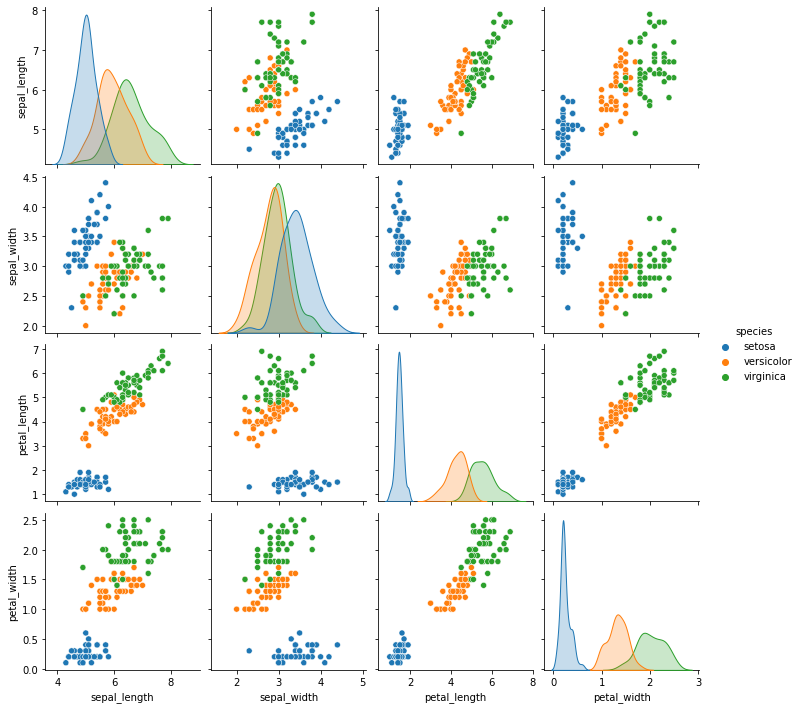

In [17]:
sns.pairplot(df, hue = 'species')

### O Vizinho Mais Próximo

O algoritmo do vizinho mais próximos classifica um novo objeto com base nos exemplos do conjunto de treinamento que são mais próximos a ele. Cada objeto representa um ponto no espaço, o qual é definido pelo conjunto de atributos disponíveis para o modelo. Usando conceitos matemáticos, podemos calcular a distância entre dois pontos usando a fórmula da distância Euclidiana, definida como

$$d(x_i, x_j) = \sqrt{\sum_{l=1}^{d}(x_i^l - x_j^l)^2}$$

na qual $x_i$ e $x_j$ são dois pontos num espaço com $d$ atributos; $x_i^l$ e $x_j^l$ são os valores dos l-ésimo atributo de $x_i$ e $x_j$, respectivamente.

**Para pensar:** Qual a distância euclidiana entre os elementos da linha 0 e da linha 5 usando apenas `sepal_length` e `petal_length`? E entre o elemento da linha 0 e da linha 55?

In [26]:
((df.iloc[0]['sepal_length'] - df.iloc[5]['sepal_length'])**2 + \
(df.iloc[0]['petal_length'] - df.iloc[5]['petal_length'])**2)**0.5

0.424264068711929

In [29]:
def calcula_distancia(xi, xj):
    return ((xi['sepal_length'] - xj['sepal_length'])**2 + (xi['petal_length'] - xj['petal_length'])**2)**0.5
    

In [30]:
calcula_distancia(df.iloc[0], df.iloc[5])

0.424264068711929

In [31]:
calcula_distancia(df.iloc[0], df.iloc[55])

3.1575306807693893

In [32]:
df.iloc[5]['species']

'setosa'

In [33]:
df.iloc[0]['species']

'setosa'

Dessa forma, num modelo de classificação, a classe predita para uma nova instância será aquela do vizinho mais próximo a essa nova instâcia. 

<img src="imagens/knn.png" alt="Drawing" style="width: 250px;"/>

Nesse modelo a fase de treinamento consiste apenas na leitura dos dados de treino, sendo por esse motivo conhecido como um algoritmo preguiçoso: todos os cálculos necessários são realizados apenas no momento de predição.

**Para pensar:** Construir um função que calcula a distância entre 2 pontos com n dimensões.

In [34]:
df.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [ ]:
def calcula_distancia(xi, xj):
    return ((xi['sepal_length'] - xj['sepal_length'])**2 + (xi['petal_length'] - xj['petal_length'])**2)**0.5
    

In [38]:
calcula_distancia(df.iloc[0, 0:3], df.iloc[5, 0:3])

0.424264068711929

**Para pensar:** Construir um função que calcula o a predição da classe de um elemento usando o Vizinho Mais Próximo.